# Universidad de Antioquia
## Especialización en Analítica y Ciencia de Datos

Integrantes:

Jose Daniel Alvear Acevedo

Alfonso Cubillos Delgado

In [ ]:
from IPython.display import Image
Image(url='https://upload.wikimedia.org/wikipedia/commons/thumb/e/e0/Three_Phase_Electric_Power_Transmission.jpg/1200px-Three_Phase_Electric_Power_Transmission.jpg')

# **--> Primera Iteración**

# **Contexto del problema**

Las líneas eléctricas aéreas de media tensión recorren cientos de millas para suministrar energía a las ciudades. Estas grandes distancias hacen que sea costoso inspeccionar manualmente las líneas en busca de daños que no provoquen inmediatamente un corte de energía, como una rama de un árbol golpeando la línea o una falla en el aislante. Estos modos de daño conducen a un fenómeno conocido como descarga parcial, una descarga eléctrica que no une completamente los electrodos entre un sistema de aislamiento. Las descargas parciales dañan lentamente la línea eléctrica, por lo que si no se reparan, eventualmente provocarán un corte de energía o provocarán un incendio.

Su desafío es detectar patrones de descarga parcial en señales adquiridas de estas líneas eléctricas con un nuevo medidor diseñado en el Centro ENET en VŠB . Los clasificadores efectivos que utilizan estos datos permitirán monitorear continuamente las líneas eléctricas en busca de fallas.

El Centro ENET investiga y desarrolla recursos energéticos renovables con el objetivo de reducir o eliminar los impactos ambientales nocivos. Sus esfuerzos se centran en desarrollar soluciones tecnológicas en torno al transporte y procesamiento de materias primas energéticas.

Al desarrollar una solución para detectar descargas parciales, ayudará a reducir los costos de mantenimiento y evitará cortes de energía.

# **Importanto librerias**

In [ ]:
import numpy as np 
import pandas as pd 
import pyarrow.parquet as pq # Leer archivos parquet
import matplotlib.pyplot as plt
import os
import seaborn as sns

# **Tomamos las 2000 primeras filas**

In [ ]:
INIT_DIR = '../input'
tamaño = 2001

In [ ]:
train = pq.read_pandas(os.path.join(INIT_DIR, 'vsb-power-line-fault-detection/train.parquet'), columns=[str(i) for i in range(tamaño)]).to_pandas()
metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_train.csv')

In [ ]:
train.tail()

In [ ]:
train.shape

In [ ]:
metadata.head()

In [ ]:
metadata.shape

In [ ]:
train_metadata = metadata[:tamaño]
train_metadata

In [ ]:
train_metadata.shape

Cada columna representa una señal, por lo tanto para manejar el mismo formato de pandas, trasponemos la base de datos

In [ ]:
train = train.T
train.shape

In [ ]:
train.head()

Adicionamos el Id de la señal en el dataframe principal

In [ ]:
train['signal_id'] = list(train_metadata['signal_id'])

In [ ]:
train.head()

**Unión de metadatos y datos de señales basados en signal_id**

In [ ]:
train = train.merge(train_metadata, on='signal_id')

In [ ]:
train.head()

**Revisando valores nulos en el dataframe**

In [ ]:
train.isnull().sum().sum()

**Gráficos de conteo frente a gráficos de destino para verificar el desequilibrio de datos**

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sns.countplot(x="target", data=train, ax=ax1)
sns.countplot(x="target", data=train, hue="phase", ax=ax2);

In [ ]:
target_count = train.target.value_counts()
print("negative(target=0) target: {}".format(target_count[0]))
print("positive(target=1) target: {}".format(target_count[1]))
print("positive data {:.3}%".format((target_count[1]/(target_count[0]+target_count[1]))*100))

In [ ]:
train[['id_measurement', 'phase']]

In [ ]:
target_mismatch = train[["id_measurement", "target"]].groupby(["id_measurement"]).sum().query("target != 3 & target != 0")
print("Valores de la variable objetivo que no son positivos ni negativos: {}".format(target_mismatch.shape[0]))
target_mismatch

Revisemos el Id == 67, donde la variable objetivo es diferente en diferentes fases

In [ ]:
train[train['id_measurement'] == 67]

**Observación:**

Las variables objetivo pueden ser diferentes para la misma señal en diferentes fases

**Hallamos el único valor del id_measurement**

In [ ]:
print("id_measurement tiene {} valores únicos".format(train.id_measurement.nunique()))

**Descripción de la columna id_measurement**

In [ ]:
train.id_measurement.value_counts().describe()

**Valores únicos de la columna phase**

In [ ]:
print("La variable fase tiene {} valores únicos en train {}".format(len(train.phase.unique()),train.phase.unique()))

In [ ]:
sns.countplot(train['phase']);

# **Graficando las señales**

**Graficando una señal normal**

In [ ]:
train.loc[1]['target']

In [ ]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[1].values), alpha=0.7);
plt.ylim([-100, 100])

**Grficando una señal defectuosa**

In [ ]:
train.loc[201]['target']

In [ ]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[201].values), alpha=0.7);
plt.ylim([-100, 100])

**Graficando las tres fases de una señal**

In [ ]:
train.loc[0:2][['target', 'id_measurement']]

In [ ]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[0].values), alpha=0.7);
plt.plot((train.loc[1].values), alpha=0.7);
plt.plot((train.loc[2].values), alpha=0.7);
plt.ylim([-100, 100])

**Graficando las tres fases de una señal defectuosa**

In [ ]:
train.loc[3:5][['target', 'id_measurement']]

In [ ]:
plt.figure(figsize=(24, 8))
plt.plot((train.loc[3].values), alpha=0.7);
plt.plot((train.loc[4].values), alpha=0.7);
plt.plot((train.loc[5].values), alpha=0.7);
plt.ylim([-100, 100])

# **Primera Iteración**

Dado el tamaño de los datos, se recomienda reiniciar el entorno para ejecutar las sigientes líneas.

In [ ]:
import os
print(os.listdir("../input"))

Cargamos los datos nuevamente

In [ ]:
train_data = pq.read_pandas(os.path.join(INIT_DIR, 'vsb-power-line-fault-detection/train.parquet')).to_pandas()
train_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_train.csv')

In [ ]:
train_metadata.shape

In [ ]:
train_metadata.head(10)

In [ ]:
train_data.shape

In [ ]:
train_data.tail(10)

Vamos a tomar el primer 1% de los datos para realizar una primera iteración del modelo, ya que no poseemos recursos computacionales para poder tomar la base de datos completa.

In [ ]:
# Generar codigo para carga total de los datos 




In [ ]:
train = train_data.iloc[:8000]
target = train_metadata.target[:8000]
print(train.shape)
print(target.shape)
train

In [ ]:
train.info()

A continuación realizaremos un análisis de componentes principales (PCA por sus siglas en inglés) para determinar si podemos utilizar una menor cantidad de variables.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.5, whiten=True)

X_pca = pca.fit_transform(train)

print('Número original de atributos:', train.shape[1])
print('Número reducido de atributos:', X_pca.shape[1])

Con el análisis previo, vamos a implementar inicialmente una regresión logística como primera iteración del conjunto de datos.

Para ello, vamos a utilizar la regresión logística con los datos originales, con el PCA y los datos estandarizados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Precisión de datos originales:', accuracy_score(y_test, y_pred))
#######

X_train, X_test, y_train, y_test = train_test_split(X_pca, target, test_size=0.3, random_state=42)

model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Precisión de datos reducidos:', accuracy_score(y_test, y_pred))

X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.3, random_state=42)

pca = PCA(n_components=0.5, whiten=True)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = LogisticRegression(solver='saga', multi_class='multinomial', max_iter=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Precisión de datos originales estandarizados:', accuracy_score(y_test, y_pred))

# **Plan de trabajo para las siguientes iteraciones**

De los anteriores resultados, podemos observar que se obtuvo una precisión muy alta en los tres modelos. Por una análisis posterior podemos afirmar que el modelo se ve afectado por el desbalanceo de los datos, por lo tanto el conjunto de entrenamiento y validación no se están particionando de forma adecuada.

Así, para las siguientes iteraciones vamos a aplicar técnicas para el análisis de datos desbalanceados tales como: submuestreo inteligente, sobremuestreo inteligente, muestreo durante la validación y pesos diferentes para el error durante el entrenamiento.

Además determinar si existe independencia entre las muestras para así poder realizar un análisis suponiendo normalidad de los datos y poder tomar muestras las cuales no van a interferir con las demás.       

**--------------------------------------------------------------------------------------------------------------------------------------------**

# **--> Segunda Iteración**

Luego del analisis realizado en la iteración 1, se determina que no es posible hacer un entrenamiento optimo con solo el 1% de los datos; por lo tanto se toman medidas drasticas para abordar el problema

**--------------- Primera parte--------------------**

**Importamos las librerias**

In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, RobustScaler
import gc
from skimage.restoration import denoise_wavelet
import scipy.signal as signal
import scipy.stats as stats
import time
import itertools

pd.set_option("max_columns", 200)
pd.set_option("max_rows", 200)
gc.enable()

In [ ]:
def metrica(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    numerator = (tp * tn - fp * fn) 
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** .5

    return numerator / (denominator + 1e-15)

In [ ]:
def read_metadata():
    """
    Lectura de los metadatos de Entrenamiento y de Test
    """
    train_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_train.csv')
    test_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_test.csv')
    return (train_metadata, test_metadata)

def resample_train():
    """
    Lectura del archivo que contiene las mediciones de las señales, se trasponen las columnas y se agrega 
    la columna target de los datasets anteriores.
    """
    data = pq.read_pandas('../input/vsb-power-line-fault-detection/train.parquet').to_pandas().transpose()
    target = read_metadata()[0]['target'].values
    data['target'] = target
    p_indices = data[data.target == 0].index
    np.random.seed(311)
    random_indices = np.random.choice(p_indices, 1777, replace=False)
    df = pd.concat([data.loc[random_indices][['target']], 
                    data[target == 1][['target']]]).sample(frac=1.0, random_state=311)
    df.to_csv('train_us_target.csv', index=False)
    return df.index

In [ ]:
train_metadata, test_metadata = read_metadata()


In [ ]:
train_metadata.tail()

In [2]:
tr_limits = []
start = 0
end = 8712
while True:
    if (start+1000) <= 8712:
        tr_limits.append((start, start+1000))
        start=start+1000
    else:
        tr_limits.append((start, end))
        break
        
ts_limits = []
start = 8712
end = 29049
while True:
    if (start+1000) <= 29049:
        ts_limits.append((start, start+1000))
        start=start+1000
    else:
        ts_limits.append((start, end))
        break

In [ ]:
def peak_calc(isTrain, filterSignal=True):
    """
    Calculo de picos de las señales
    
    """
    print("peak_calc | start:", time.strftime("%H:%M"))
    peak_counts = {}
    # peak_counts expected values: [[1,3,5,1,6], [4,5,2,2,1], ..]
    
    def f1(df):
        nonlocal peak_counts
        df = df.transpose().values
        def filter_sg(sg):
            wv = denoise_wavelet(sg, sigma=None, wavelet='haar', mode='hard', 
                                 wavelet_levels=15, multichannel=False, 
                                 convert2ycbcr=False, method='VisuShrink') #ELiminando el Ruido ------>
            B, A = signal.butter(N=3, Wn=0.1, output='ba')
            smooth_data = signal.filtfilt(B, A, wv)
            res = (wv - smooth_data) * 100
            return res
        
        if filterSignal:
            df = np.apply_along_axis(filter_sg, 1, df) #Aplicar una función a cortes 1-D a lo largo del eje dado.
        
        print("height", time.strftime("%H:%M"))
        for h in [3, 5, 8, 10, 15, 25, 50, 100]:
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, height=h)[:, 0]
            num_peaks = [len(x) for x in peaks] 
            if ('height_more_' + str(h)) in peak_counts:
                peak_counts['height_more_' + str(h)].extend(num_peaks)
            else:
                peak_counts['height_more_' + str(h)] = num_peaks
        
        print("threshold", time.strftime("%H:%M"))
        for t in [3, 10, 16, 50]:
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, threshold=t)[:, 0]
            num_peaks = [len(x) for x in peaks] 
            if ('threshold_more_' + str(t)) in peak_counts:
                peak_counts['threshold_more_' + str(t)].extend(num_peaks)
            else:
                peak_counts['threshold_more_' + str(t)] = num_peaks
                
        print("height and distance", time.strftime("%H:%M"))
        for h, d in itertools.product([3, 5, 8, 10, 15, 25, 50, 100],
                                      [5, 7, 25, 75, 111, 1000, 11111, 100000]):
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, height=h, distance=d)[:, 0]
            num_peaks = [len(x) for x in peaks] 
            col_name = 'h_bt_' + str(h) + '_dist_bt_' + str(d)
            if (col_name) in peak_counts:
                peak_counts[col_name].extend(num_peaks)
            else:
                peak_counts[col_name] = num_peaks
                
        print("height and width", time.strftime("%H:%M"))
        for h, w in itertools.product([3, 5, 8, 10, 15, 25, 50, 100],
                                      [5, 10, 30, 70, 100, 200, 500]):
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, height=h, width=w, rel_height=0.4)[:, 0]
            num_peaks = [len(x) for x in peaks] 
            col_name = 'h_bt_' + str(h) + '_w_bt_' + str(w)
            if (col_name) in peak_counts:
                peak_counts[col_name].extend(num_peaks)
            else:
                peak_counts[col_name] = num_peaks
        del peaks
        
        print("max/min widths/proms", time.strftime("%H:%M"))
        max_wdth_pk = []
        min_wdth_pk = []
        max_prom_pk = []
        min_prom_pk = []
        for n in range(df.shape[0]):
            seq = df[n, :]
            peaks, _ = signal.find_peaks(seq, height=7, threshold=None, distance=None, width=None)
            if len(peaks) == 0:
                pk_proms = [[0]]
                pk_wdths = [0]
            else:
                pk_proms = signal.peak_prominences(seq, peaks, wlen=None)
                pk_wdths = signal.peak_widths(seq, peaks, rel_height=0.4, 
                                              prominence_data=pk_proms, wlen=None)[0]
            max_wdth_pk.append(max(pk_wdths))
            min_wdth_pk.append(min(pk_wdths))
            max_prom_pk.append(max(pk_proms[0]))
            min_prom_pk.append(min(pk_proms[0]))
        if ('max_peak_width') in peak_counts:
            peak_counts['max_peak_width'].extend(max_wdth_pk)
        else:
            peak_counts['max_peak_width'] = max_wdth_pk
        if ('min_peak_width') in peak_counts:
            peak_counts['min_peak_width'].extend(min_wdth_pk)
        else:
            peak_counts['min_peak_width'] = min_wdth_pk
        if ('max_peak_prom') in peak_counts:
            peak_counts['max_peak_prom'].extend(max_prom_pk)
        else:
            peak_counts['max_peak_prom'] = max_prom_pk
        if ('min_peak_prom') in peak_counts:
            peak_counts['min_peak_prom'].extend(min_prom_pk)
        else:
            peak_counts['min_peak_prom'] = min_prom_pk
            
    if isTrain:
        limits = tr_limits
        path = '../input/vsb-power-line-fault-detection/train.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f1(df)
    else:
        limits = ts_limits
        path = '../input/vsb-power-line-fault-detection/test.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f1(df)
            
    del df; gc.collect()
    print("peak_calc | end:", time.strftime("%H:%M"))
    return peak_counts

In [ ]:
def pulse_stats(isTrain):
    """
    Estadisticas de las señales
    
    """
    print("pulse_stats | start:", time.strftime("%H:%M"))
    sg_max = np.array([], dtype=np.float16)
    sg_min = np.array([], dtype=np.float16)
    sg_mean = np.array([], dtype=np.float16)
    sg_std = np.array([], dtype=np.float16)
    perc1 = np.array([], dtype=np.float16)
    perc3 = np.array([], dtype=np.float16)
    perc5 = np.array([], dtype=np.float16)
    perc7 = np.array([], dtype=np.float16)
    perc9 = np.array([], dtype=np.float16)
    sg_skew = np.array([], dtype=np.float16)
    def f2(df):
        nonlocal sg_max, sg_min, sg_mean, sg_std, perc1, perc3, perc5, perc7, perc9, sg_skew
        df = df.transpose()
        sg_max = np.append(sg_max, df.max(axis=1))
        sg_min = np.append(sg_min, df.min(axis=1))
        sg_mean = np.append(sg_mean, df.mean(axis=1))
        sg_std = np.append(sg_std, df.apply(func=np.std, axis=1, raw=True))
        perc1 = np.append(perc1, df.quantile(q=0.1, axis=1))
        perc3 = np.append(perc3, df.quantile(q=0.3, axis=1))
        perc5 = np.append(perc5, df.quantile(q=0.5, axis=1))
        perc7 = np.append(perc7, df.quantile(q=0.7, axis=1))
        perc9 = np.append(perc9, df.quantile(q=0.9, axis=1))
        sg_skew = np.append(sg_skew, df.apply(func=stats.skew, axis=1, raw=True))

    if isTrain:
        limits = tr_limits
        path = '../input/vsb-power-line-fault-detection/train.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f2(df)
    else:
        limits = ts_limits
        path = '../input/vsb-power-line-fault-detection/test.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f2(df)
    del df; gc.collect()
    res = pd.DataFrame({'sg_max': sg_max,
                        'sg_min': sg_min,
                        'sg_mean': sg_mean,
                        'sg_std': sg_std,
                        'perc1': perc1,
                        'perc3': perc3,
                        'perc5': perc5,
                        'perc7': perc7,
                        'perc9': perc9,
                        'sg_skew': sg_skew
                       })
    print("pulse_stats | end:", time.strftime("%H:%M"))
    return res

# **Nota:**
* Estos bucles son bastante demorados (Calculo de picos), ya que se esta construyendo las bases de datos ('final_v1_tr' y 'final_v1_ts') para el entrenamiento y test, por lo tanto se dejan los resultados en el GitHub ( https://github.com/joseDalvear/VSB-Power-Line-Fault-Detection ) para que no tengas que esperar la ejeción (Tiempo Aproximado de 5 Horas).

*Nota: En caso de descargar los archivos dispuestos en el repositorio, es necesario que los cargue manualmente a Kaggle y cambie las rutas de cada uno segun lo requiera el codigo. En caso de dudas visite nuevamente el repositorio y encontrara mas instrucciones para la ejecución del proyecto.*

In [ ]:
tr = pulse_stats(isTrain=True)
peak_counts = peak_calc(isTrain=True)
for k, v in peak_counts.items():
    tr[k] = v

ts = pulse_stats(isTrain=False)
peak_counts = peak_calc(isTrain=False)
for k, v in peak_counts.items():
    ts[k] = v
    
del peak_counts; gc.collect()

In [ ]:
tr.to_csv('final_v1_tr', index=False)
ts.to_csv('final_v1_ts', index=False)

In [ ]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return ('matthews', metrica(labels, preds), True)


train_data = lgb.Dataset(tr, label=train_metadata['target'])
params={'learning_rate': 0.1, 'objective':'binary', 'metric':'None', 
        'num_leaves': 777, 'verbose': 1, 'random_state':311, 'max_depth': 11,
        'bagging_fraction': 0.7, 'feature_fraction': 1.0, 'min_data_in_leaf': 33,
        'is_unbalance': True}
num_round = 15000
light = lgb.train(params, train_data, num_round, feval=evalerror)
pred = light.predict(ts)
feature_importances = light.feature_importance()
feature_names = ts.columns.values

In [ ]:
plt.hist(pred, bins=100);

In [ ]:
pred = np.where(pred > 0.6, 1, 0)

In [ ]:
submission = pd.DataFrame({
        "signal_id": test_metadata['signal_id'],
        "target": pred
})

submission.to_csv('submission.csv', index=False)

In [ ]:
def plot_feat_importances(feature_names, fi, figsize=(12,8), color="royalblue"):
    feature_importances = fi
    feature_importances = pd.Series(
        feature_importances, index=feature_names
        ).sort_values(ascending=False).iloc[:100]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=feature_importances, 
                y=feature_importances.index, 
                color=color);
    plt.xlabel('Feature Importance');
    plt.ylabel('Feature');

plot_feat_importances(feature_names, feature_importances, figsize=(12, 30))
len(feature_names)

In [ ]:
resample_train()

In [ ]:
val = tr.copy()
val['target'] = pd.read_csv('train_us_target.csv')
val = val.sample(frac=0.7, replace=True, random_state=2)
tr_pred = light.predict(val.drop('target', axis=1))
tr_pred = np.where(tr_pred > 0.8, 1, 0)
metrica(val['target'], tr_pred)

**--------------- Segunda parte--------------------**

* El proceso es muy similar al anterior

In [1]:
def metrica(y_true, y_pred):
    """
    Metrica del proyecto
    
    """
    assert y_true.shape[0] == y_pred.shape[0]
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    numerator = (tp * tn - fp * fn) 
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** .5

    return numerator / (denominator + 1e-15)

In [2]:
def read_metadata():
    train_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_train.csv')
    test_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_test.csv')
    return (train_metadata, test_metadata)
def resample_train():
    data = pq.read_pandas('../input/vsb-power-line-fault-detection/train.parquet').to_pandas().transpose()
    target = read_metadata()[0]['target'].values
    data['target'] = target
    p_indices = data[data.target == 0].index
    np.random.seed(311)
    random_indices = np.random.choice(p_indices, 1777, replace=False)
    df = pd.concat([data.loc[random_indices][['target']], 
                    data[target == 1][['target']]]).sample(frac=1.0, random_state=311)
    df.to_csv('train_us_target.csv', index=False)
    return df.index

In [3]:
train_metadata, test_metadata = read_metadata()

NameError: name 'pd' is not defined

In [ ]:
train_metadata.tail()

In [ ]:
tr_limits = []
start = 0
end = 8712
while True:
    if (start+1000) <= 8712:
        tr_limits.append((start, start+1000))
        start=start+1000
    else:
        tr_limits.append((start, end))
        break
        
ts_limits = []
start = 8712
end = 29049
while True:
    if (start+1000) <= 29049:
        ts_limits.append((start, start+1000))
        start=start+1000
    else:
        ts_limits.append((start, end))
        break

In [ ]:
def peak_calc(isTrain, filterSignal=True):
    print("peak_calc | start:", time.strftime("%H:%M"))
    peak_counts = {}
    # peak_counts expected values: [[1,3,5,1,6], [4,5,2,2,1], ..]
    
    def f1(df):
        nonlocal peak_counts
        df = df.transpose().values
        
        def filter_sg(sg):
            wv = denoise_wavelet(sg, sigma=None, wavelet='haar', mode='hard', 
                                 wavelet_levels=15, multichannel=False, 
                                 convert2ycbcr=False, method='VisuShrink')
            B, A = signal.butter(N=3, Wn=0.1, output='ba')
            smooth_data = signal.filtfilt(B, A, wv)
            res = (wv - smooth_data) * 100
            return res
        
        if filterSignal:
            df = np.apply_along_axis(filter_sg, 1, df)
        
        print("height", time.strftime("%H:%M"))
        for h in [3, 5, 8, 10, 15, 25, 50, 100]:
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, height=(None, -h))[:, 0]
            num_peaks = [len(x) for x in peaks] 
            if ('height_more_' + str(h)) in peak_counts:
                peak_counts['height_more_' + str(h)].extend(num_peaks)
            else:
                peak_counts['height_more_' + str(h)] = num_peaks
        
        print("threshold", time.strftime("%H:%M"))
        for t in [3, 10, 16, 50]:
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, threshold=(None, -t))[:, 0]
            num_peaks = [len(x) for x in peaks] 
            if ('threshold_more_' + str(t)) in peak_counts:
                peak_counts['threshold_more_' + str(t)].extend(num_peaks)
            else:
                peak_counts['threshold_more_' + str(t)] = num_peaks
                
        print("height and distance", time.strftime("%H:%M"))
        for h, d in itertools.product([3, 5, 8, 10, 15, 25, 50, 100],
                                      [5, 7, 25, 75, 111, 1000, 11111, 100000]):
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, height=(None, -h), distance=d)[:, 0]
            num_peaks = [len(x) for x in peaks] 
            col_name = 'h_bt_' + str(h) + '_dist_bt_' + str(d)
            if (col_name) in peak_counts:
                peak_counts[col_name].extend(num_peaks)
            else:
                peak_counts[col_name] = num_peaks
                
        print("height and width", time.strftime("%H:%M"))
        for h, w in itertools.product([3, 5, 8, 10, 15, 25, 50, 100],
                                      [5, 10, 30, 70, 100, 200, 500]):
            peaks = np.apply_along_axis(signal.find_peaks, 1, df, height=(None, -h), width=w, rel_height=0.4)[:, 0]
            num_peaks = [len(x) for x in peaks] 
            col_name = 'h_bt_' + str(h) + '_w_bt_' + str(w)
            if (col_name) in peak_counts:
                peak_counts[col_name].extend(num_peaks)
            else:
                peak_counts[col_name] = num_peaks
        del peaks
        
        print("max/min widths/proms", time.strftime("%H:%M"))
        max_wdth_pk = []
        std_wdth_pk = []
        skew_wdth_pk = []
        min_wdth_pk = []
        max_prom_pk = []
        std_prom_pk = []
        skew_prom_pk = []
        min_prom_pk = []
        for n in range(df.shape[0]):
            seq = df[n, :]
            peaks, _ = signal.find_peaks(seq, height=(None, -7), threshold=None, distance=None, width=None)
            if len(peaks) == 0:
                pk_proms = [[0]]
                pk_wdths = [0]
            else:
                pk_proms = signal.peak_prominences(seq, peaks, wlen=None)
                pk_wdths = signal.peak_widths(seq, peaks, rel_height=0.4, 
                                              prominence_data=pk_proms, wlen=None)[0]
            max_wdth_pk.append(max(pk_wdths))
            std_wdth_pk.append(np.std(pk_wdths))
            skew_wdth_pk.append(stats.skew(pk_wdths))
            min_wdth_pk.append(min(pk_wdths))
            max_prom_pk.append(max(pk_proms[0]))
            std_prom_pk.append(np.std(pk_proms[0]))
            skew_prom_pk.append(stats.skew(pk_proms[0]))
            min_prom_pk.append(min(pk_proms[0]))
        if ('max_peak_width') in peak_counts:
            peak_counts['max_peak_width'].extend(max_wdth_pk)
        else:
            peak_counts['max_peak_width'] = max_wdth_pk
        if ('std_peak_width') in peak_counts:
            peak_counts['std_peak_width'].extend(std_wdth_pk)
        else:
            peak_counts['std_peak_width'] = std_wdth_pk
        if ('skew_peak_width') in peak_counts:
            peak_counts['skew_peak_width'].extend(skew_wdth_pk)
        else:
            peak_counts['skew_peak_width'] = skew_wdth_pk
        if ('min_peak_width') in peak_counts:
            peak_counts['min_peak_width'].extend(min_wdth_pk)
        else:
            peak_counts['min_peak_width'] = min_wdth_pk
        if ('max_peak_prom') in peak_counts:
            peak_counts['max_peak_prom'].extend(max_prom_pk)
        else:
            peak_counts['max_peak_prom'] = max_prom_pk
        if ('std_peak_prom') in peak_counts:
            peak_counts['std_peak_prom'].extend(std_prom_pk)
        else:
            peak_counts['std_peak_prom'] = std_prom_pk
        if ('skew_peak_prom') in peak_counts:
            peak_counts['skew_peak_prom'].extend(skew_prom_pk)
        else:
            peak_counts['skew_peak_prom'] = skew_prom_pk
        if ('min_peak_prom') in peak_counts:
            peak_counts['min_peak_prom'].extend(min_prom_pk)
        else:
            peak_counts['min_peak_prom'] = min_prom_pk
            
    if isTrain:
        limits = tr_limits
        path = '../input/vsb-power-line-fault-detection/train.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f1(df)
    else:
        limits = ts_limits
        path = '../input/vsb-power-line-fault-detection/test.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f1(df)
            
    del df; gc.collect()
    print("peak_calc | end:", time.strftime("%H:%M"))
    return peak_counts

In [ ]:
def pulse_stats(isTrain):
    print("pulse_stats | start:", time.strftime("%H:%M"))
    sg_max = np.array([], dtype=np.float16)
    sg_min = np.array([], dtype=np.float16)
    sg_mean = np.array([], dtype=np.float16)
    sg_std = np.array([], dtype=np.float16)
    perc1 = np.array([], dtype=np.float16)
    perc3 = np.array([], dtype=np.float16)
    perc5 = np.array([], dtype=np.float16)
    perc7 = np.array([], dtype=np.float16)
    perc9 = np.array([], dtype=np.float16)
    sg_skew = np.array([], dtype=np.float16)
    def f2(df):
        nonlocal sg_max, sg_min, sg_mean, sg_std, perc1, perc3, perc5, perc7, perc9, sg_skew
        df = df.transpose()
        sg_max = np.append(sg_max, df.max(axis=1))
        sg_min = np.append(sg_min, df.min(axis=1))
        sg_mean = np.append(sg_mean, df.mean(axis=1))
        sg_std = np.append(sg_std, df.apply(func=np.std, axis=1, raw=True))
        perc1 = np.append(perc1, df.quantile(q=0.1, axis=1))
        perc3 = np.append(perc3, df.quantile(q=0.3, axis=1))
        perc5 = np.append(perc5, df.quantile(q=0.5, axis=1))
        perc7 = np.append(perc7, df.quantile(q=0.7, axis=1))
        perc9 = np.append(perc9, df.quantile(q=0.9, axis=1))
        sg_skew = np.append(sg_skew, df.apply(func=stats.skew, axis=1, raw=True))

    if isTrain:
        limits = tr_limits
        path = '../input/vsb-power-line-fault-detection/train.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f2(df)
    else:
        limits = ts_limits
        path = '../input/vsb-power-line-fault-detection/test.parquet'
        for i, j in limits:
            df = pq.read_pandas(path, columns=[str(i) for i in range(i, j)]).to_pandas()
            f2(df)
    del df; gc.collect()
    res = pd.DataFrame({'sg_max': sg_max,
                        'sg_min': sg_min,
                        'sg_mean': sg_mean,
                        'sg_std': sg_std,
                        'perc1': perc1,
                        'perc3': perc3,
                        'perc5': perc5,
                        'perc7': perc7,
                        'perc9': perc9,
                        'sg_skew': sg_skew
                       })
    print("pulse_stats | end:", time.strftime("%H:%M"))
    return res

# **Nota:**
* Estos bucles son bastante demorados (Calculo de picos), ya que se esta construyendo las bases de datos ('final_v2_tr' y 'final_v2_ts') para el entrenamiento y test, por lo tanto se dejan los resultados en el GitHub ( https://github.com/joseDalvear/VSB-Power-Line-Fault-Detection ) para que no tengas que esperar la ejeción (Tiempo Aproximado de 4.5 Horas).

*Nota: En caso de descargar los archivos dispuestos en el repositorio, es necesario que los cargue manualmente a Kaggle y cambie las rutas de cada uno segun lo requiera el codigo. En caso de dudas visite nuevamente el repositorio y encontrara mas instrucciones para la ejecución del proyecto.*

In [ ]:
tr = pulse_stats(isTrain=True)
peak_counts = peak_calc(isTrain=True)
for k, v in peak_counts.items():
    tr[k] = v

ts = pulse_stats(isTrain=False)
peak_counts = peak_calc(isTrain=False)
for k, v in peak_counts.items():
    ts[k] = v
    
del peak_counts; gc.collect()

In [ ]:
tr.to_csv('final_v2_tr', index=False)
ts.to_csv('final_v2_ts', index=False)

In [ ]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return ('matthews', metrica(labels, preds), True)


train_data = lgb.Dataset(tr, label=train_metadata['target'])
params={'learning_rate': 0.1, 'objective':'binary', 'metric':'None', 
        'num_leaves': 777, 'verbose': 1, 'random_state':311, 'max_depth': 11,
        'bagging_fraction': 0.7, 'feature_fraction': 1.0, 'min_data_in_leaf': 33,
        'is_unbalance': True}
num_round = 15000
light = lgb.train(params, train_data, num_round, feval=evalerror)
pred = light.predict(ts)
feature_importances = light.feature_importance()
feature_names = ts.columns.values

In [ ]:
plt.hist(pred, bins=100);

In [ ]:
pred = np.where(pred > 0.6, 1, 0)

In [ ]:
submission = pd.DataFrame({
        "signal_id": test_metadata['signal_id'],
        "target": pred
})

submission.to_csv('submission.csv2', index=False)

In [ ]:
def plot_feat_importances(feature_names, fi, figsize=(12,8), color="royalblue"):
    feature_importances = fi
    feature_importances = pd.Series(
        feature_importances, index=feature_names
        ).sort_values(ascending=False).iloc[:100]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=feature_importances, 
                y=feature_importances.index, 
                color=color);
    plt.xlabel('Feature Importance');
    plt.ylabel('Feature');
    print(feature_importances.head(25).index)

plot_feat_importances(feature_names, feature_importances, figsize=(12, 30))

In [ ]:
resample_train()

In [ ]:
val = tr.copy()
val['target'] = train_metadata['target']
val = val.sample(frac=0.7, replace=True, random_state=2)
tr_pred = light.predict(val.drop('target', axis=1))
tr_pred = np.where(tr_pred > 0.8, 1, 0)
metrica(val['target'], tr_pred)

**--------------- Tercera parte--------------------**

**Modelos**

* Utilizamos los modelos con las bases de datos generadas anteriormente en la primera y segunda parte 

Importamos los modelos y librerias a utilizar 

In [3]:
from skimage.restoration import denoise_wavelet
import scipy.signal as signal
import scipy.stats as stats
import time
import itertools
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
from sklearn.linear_model import SGDRegressor
from matplotlib import pyplot as plt
import seaborn as sns
import lightgbm as lgb
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale, RobustScaler
import gc


pd.set_option("max_columns", 200)
pd.set_option("max_rows", 200)
gc.enable()

In [4]:
def metrica(y_true, y_pred):
    assert y_true.shape[0] == y_pred.shape[0]
    
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    numerator = (tp * tn - fp * fn) 
    denominator = ((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn)) ** .5

    return numerator / (denominator + 1e-15)

In [5]:
def read_metadata():
    train_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_train.csv')
    test_metadata = pd.read_csv('../input/vsb-power-line-fault-detection/metadata_test.csv')
    return (train_metadata, test_metadata)

def resample_train():
    data = pq.read_pandas('../input/vsb-power-line-fault-detection/train.parquet').to_pandas().transpose()
    target = read_metadata()[0]['target'].values
    data['target'] = target
    p_indices = data[data.target == 0].index
    np.random.seed(311)
    random_indices = np.random.choice(p_indices, 1777, replace=False)
    df = pd.concat([data.loc[random_indices][['target']], 
                    data[target == 1][['target']]]).sample(frac=1.0, random_state=311)
    df.to_csv('train_us_target.csv', index=False)
    return df.index

In [6]:
train_metadata, test_metadata = read_metadata()
# resampling_index = resample_train()

# **Nota**
Es muy probable que toque organziar las rutas de los archivos para que no genere error, para hacerlo es solo ir al panel derecho dispuesto para "Data" y dar clic en "Copy file path" a la data que se pretende seleccionar; copiar la ruta y pegarla en medio de las comillas simples donde se hace referencia a la ruta del archivo.

* En caso de presentar errores visite: https://github.com/joseDalvear/VSB-Power-Line-Fault-Detection  Donde encontrar mas instrucciones para la ejecución del proyecto

*Nota: En caso de descargar los archivos dispuestos en el repositorio, es necesario que los cargue manualmente a Kaggle y cambie las rutas de cada uno segun lo requiera el codigo. En caso de dudas visite nuevamente el repositorio y encontrara mas instrucciones para la ejecución del proyecto.*

In [7]:
tr_v1 = pd.read_csv('../input/output-notebook-1/final_v1_tr')
tr_v2 = pd.read_csv('../input/outputnotebook2/final_v2_tr')
# tr_v3 = pd.read_csv('final_v3_tr.csv')
# tr_v4 = pd.read_csv('final_v4_tr.csv')

ts_v1 = pd.read_csv('../input/output-notebook-1/final_v1_ts')
ts_v2 = pd.read_csv('../input/outputnotebook2/final_v2_ts')
# ts_v3 = pd.read_csv('final_v3_ts.csv')
# ts_v4 = pd.read_csv('final_v4_ts.csv')

tr_v2.drop(['std_peak_width', 'skew_peak_width', 'std_peak_prom', 'skew_peak_prom'], axis=1, inplace=True)
ts_v2.drop(['std_peak_width', 'skew_peak_width', 'std_peak_prom', 'skew_peak_prom'], axis=1, inplace=True)

In [8]:
tr_v3 = tr_v1 - tr_v2
ts_v3 = ts_v1 - ts_v2
feat_names = ['h_bt_8_dist_bt_5', 'h_bt_8_dist_bt_1000', 'height_more_15', 'height_more_8', 'h_bt_3_w_bt_5', 
              'threshold_more_16', 'h_bt_5_dist_bt_5', 'h_bt_8_dist_bt_11111', 'sg_skew', 
              'h_bt_5_dist_bt_11111', 'h_bt_8_dist_bt_7', 'max_peak_prom', 'sg_min', 'h_bt_3_dist_bt_11111', 
              'sg_mean', 'sg_std', 'h_bt_5_dist_bt_75', 'h_bt_3_dist_bt_1000', 'h_bt_3_dist_bt_75', 
              'min_peak_prom', 'max_peak_width', 'h_bt_3_dist_bt_7', 'sg_max', 'h_bt_3_w_bt_10', 
              'height_more_3', 'h_bt_3_dist_bt_25', 'h_bt_5_dist_bt_111', 'min_peak_width', 
              'threshold_more_3', 'height_more_5', 'h_bt_5_dist_bt_1000', 'threshold_more_10', 
              'h_bt_5_dist_bt_25', 'h_bt_10_dist_bt_1000']

tr_v1 = tr_v1[feat_names]
ts_v1 = ts_v1[feat_names]
tr_v2 = tr_v2[feat_names]
ts_v2 = ts_v2[feat_names]
tr_v3 = tr_v3[feat_names]
ts_v3 = ts_v3[feat_names]

tr_v2.columns = ['ng-df_' + x for x in tr_v2.columns.values]
# tr_v3.columns = ['abs-df_' + x for x in tr_v3.columns.values]
# tr_v4.columns = ['tsfresh_' + x for x in tr_v4.columns.values]
tr_v3.columns = ['sub-df_' + x for x in tr_v3.columns.values]
ts_v3.columns = ['sub-df_' + x for x in ts_v3.columns.values]

ts_v2.columns = ['ng-df_' + x for x in ts_v2.columns.values]
# ts_v3.columns = ['abs-df_' + x for x in ts_v3.columns.values]
# ts_v4.columns = ['tsfresh_' + x for x in ts_v4.columns.values]

In [9]:
tr_v3.head()

,sub-df_h_bt_8_dist_bt_5,sub-df_h_bt_8_dist_bt_1000,sub-df_height_more_15,sub-df_height_more_8,sub-df_h_bt_3_w_bt_5,sub-df_threshold_more_16,sub-df_h_bt_5_dist_bt_5,sub-df_h_bt_8_dist_bt_11111,sub-df_sg_skew,sub-df_h_bt_5_dist_bt_11111,sub-df_h_bt_8_dist_bt_7,sub-df_max_peak_prom,sub-df_sg_min,sub-df_h_bt_3_dist_bt_11111,sub-df_sg_mean,sub-df_sg_std,sub-df_h_bt_5_dist_bt_75,sub-df_h_bt_3_dist_bt_1000,sub-df_h_bt_3_dist_bt_75,sub-df_min_peak_prom,sub-df_max_peak_width,sub-df_h_bt_3_dist_bt_7,sub-df_sg_max,sub-df_h_bt_3_w_bt_10,sub-df_height_more_3,sub-df_h_bt_3_dist_bt_25,sub-df_h_bt_5_dist_bt_111,sub-df_min_peak_width,sub-df_threshold_more_3,sub-df_height_more_5,sub-df_h_bt_5_dist_bt_1000,sub-df_threshold_more_10,sub-df_h_bt_5_dist_bt_25,sub-df_h_bt_10_dist_bt_1000
0,24,23,5,33,2,9,73,11,0.0,24,24,39.223901,0.0,35,0.0,0.0,71,116,167,9.398635,2.467554,174,0.0,2,218,172,71,0.702464,211,96,61,28,72,14
1,9,8,1,9,4,0,18,7,0.0,9,9,30.820668,0.0,17,0.0,0.0,17,30,32,11.166892,1.987995,37,0.0,1,42,32,17,1.167580,32,18,16,3,17,4
2,24,24,3,29,3,9,47,14,0.0,22,24,33.589246,0.0,32,0.0,0.0,44,87,114,9.985851,2.091529,121,0.0,2,171,118,44,0.673825,168,62,42,32,46,13
3,55,43,22,77,8,25,100,14,0.0,20,55,73.968227,0.0,38,0.0,0.0,87,110,154,8.636201,2550.371492,175,0.0,8,259,173,84,0.631954,244,143,66,58,95,31
4,21,18,4,21,2,2,35,9,0.0,14,21,40.783956,0.0,15,0.0,0.0,30,39,44,10.539123,2.836495,59,0.0,1,79,46,30,0.811606,65,38,29,13,32,14


In [10]:
tr_list = [tr_v1, tr_v2, tr_v3]#, tr_v4]
ts_list = [ts_v1, ts_v2, ts_v3]#, ts_v4]

for df in tr_list+ts_list:
    print(df.shape)

(8712, 34)
(8712, 34)
(8712, 34)
(20337, 34)
(20337, 34)
(20337, 34)


In [11]:

tr = pd.concat(tr_list, axis=1)
ts = pd.concat(ts_list, axis=1)

In [13]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return ('matthews', metrica(labels, preds), True)

train_data = lgb.Dataset(tr, label=train_metadata['target'])
params={'learning_rate': 0.1, 'objective':'binary', 'metric':'None', 
        'num_leaves': 777, 'verbose': 1, 'seed':311, 'max_depth': 11,
        'bagging_fraction': 0.7, 'feature_fraction': 1.0, 
        'feature_fraction_seed': 311, 'min_data_in_leaf': 33, 
        'is_unbalance': True}#, 'lambda_l1': 500, 'histogram_pool_size': 6000}
num_round = 15000
light = lgb.train(params, train_data, num_round, feval=evalerror)
light_pred = light.predict(ts)

light_pred = np.zeros(ts.shape[0])
for i in range(1,4):
    params['bagging_fraction'] = 1.0 - (i/10)
    params['seed'] = i*110
    params['learning_rate'] = 0.03 * i + 0.01
    params['max_depth'] = 9 + i*2
    params['num_leaves'] = 553 + 100*i
    light = lgb.train(params, train_data, num_round, feval=evalerror)
    light_pred += light.predict(ts)
light_pred /= 3

0    19628
1      709
dtype: int64


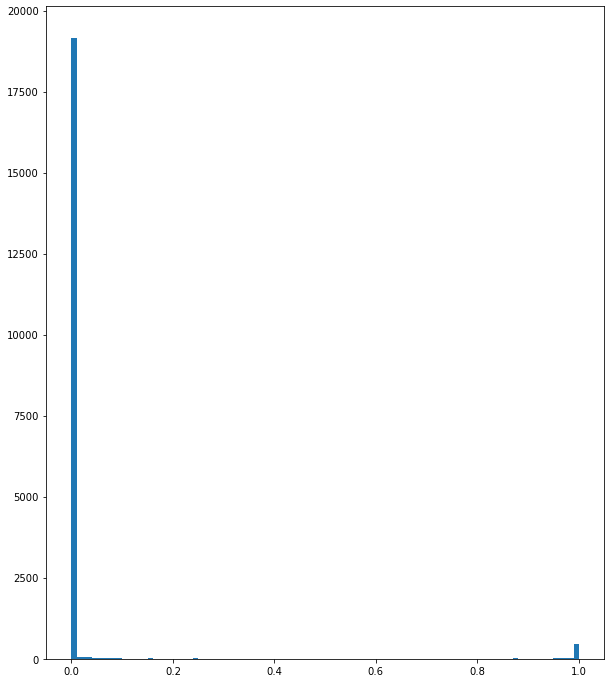

In [14]:
plt.figure(figsize=(10, 12))
plt.hist(light_pred, bins=100);
print(pd.Series(np.where(light_pred > 0.51, 1, 0).ravel()).value_counts())

In [15]:
from catboost import CatBoostClassifier, Pool

train_pool = Pool(tr, label=train_metadata['target'])
test_pool = Pool(ts) 

cat = CatBoostClassifier(random_seed=1000)
cat.fit(train_pool)
cat_pred = cat.predict_proba(test_pool)[:,1]

Learning rate set to 0.025964
0:	learn: 0.6459760	total: 68.7ms	remaining: 1m 8s
1:	learn: 0.6041117	total: 83.4ms	remaining: 41.6s
2:	learn: 0.5621032	total: 98ms	remaining: 32.6s
3:	learn: 0.5224965	total: 112ms	remaining: 28s
4:	learn: 0.4861266	total: 127ms	remaining: 25.3s
5:	learn: 0.4559053	total: 140ms	remaining: 23.3s
6:	learn: 0.4326347	total: 153ms	remaining: 21.7s
7:	learn: 0.4067837	total: 167ms	remaining: 20.7s
8:	learn: 0.3835118	total: 182ms	remaining: 20s
9:	learn: 0.3642868	total: 195ms	remaining: 19.3s
10:	learn: 0.3476716	total: 209ms	remaining: 18.8s
11:	learn: 0.3321342	total: 222ms	remaining: 18.3s
12:	learn: 0.3141703	total: 235ms	remaining: 17.9s
13:	learn: 0.2984507	total: 251ms	remaining: 17.6s
14:	learn: 0.2858736	total: 267ms	remaining: 17.5s
15:	learn: 0.2737999	total: 280ms	remaining: 17.2s
16:	learn: 0.2628184	total: 295ms	remaining: 17s
17:	learn: 0.2524477	total: 309ms	remaining: 16.8s
18:	learn: 0.2427729	total: 323ms	remaining: 16.7s
19:	learn: 0.234

0    19698
1      639
dtype: int64


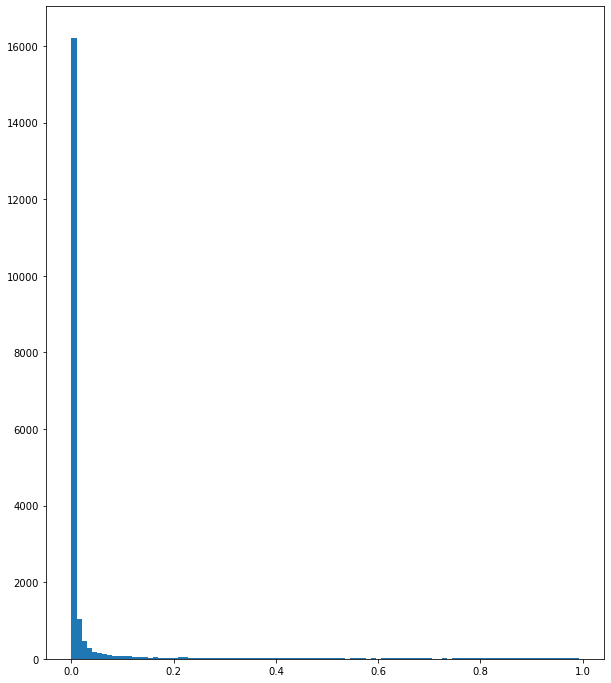

In [19]:
plt.figure(figsize=(10, 12))
plt.hist(cat_pred, bins=100);
print(pd.Series(np.where(cat_pred > 0.51, 1, 0).ravel()).value_counts())

In [17]:
import xgboost

dtrain = xgboost.DMatrix(tr, label=train_metadata['target'])
dtest = xgboost.DMatrix(ts)
params = {"nthread": 4, "seed": 3, "subsample": 0.9, "reg_lambda": 11, "reg_alpha": 11, 
          "learning_rate": 0.15, "gamma": 0, "colsample_bytree": 0.8, 
          "colsample_bylevel": 0.9, "max_depth": 50, "objective": "binary:logistic",
          'min_child_weight': 33} #hinge
num_round = 3000

xgb_pred = np.zeros(ts.shape[0])
for i in range(1,4):
    params['subsample'] = 1.0 - i/10
    params['seed'] = i*19
    params['learning_rate'] = 0.005 + i/1000 
    params['min_child_weight'] = 11*i
    xgb = xgboost.train(params, dtrain, num_round)
    xgb_pred += xgb.predict(dtest)
xgb_pred /= 3

0    19678
1      659
dtype: int64


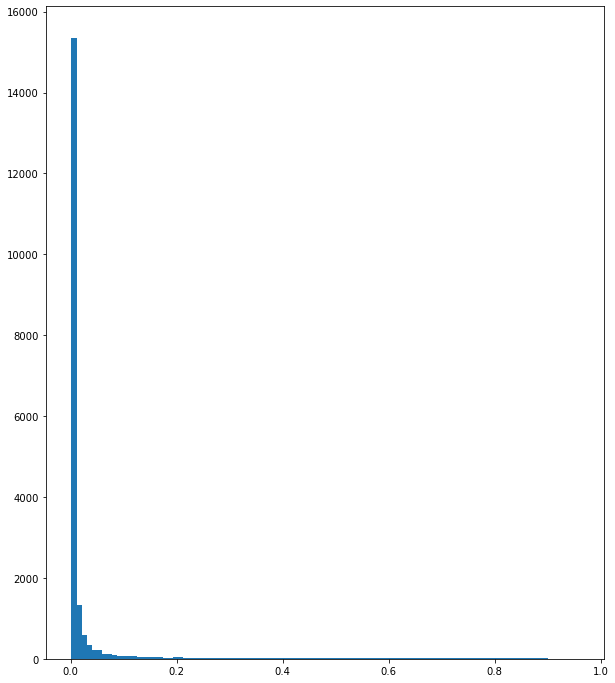

In [18]:
plt.figure(figsize=(10, 12))
plt.hist(xgb_pred, bins=100);
print(pd.Series(np.where(xgb_pred > 0.51, 1, 0).ravel()).value_counts())

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier

scaler = StandardScaler()
scaler.fit(tr)

knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='ball_tree', leaf_size=30, 
                           p=2, metric='minkowski', metric_params=None, n_jobs=None)

knn_bg = BaggingClassifier(base_estimator=knn, n_estimators=3, max_samples=0.8, 
                      max_features=1.0, bootstrap=True, bootstrap_features=False, 
                      oob_score=False, warm_start=False, n_jobs=1, 
                      random_state=7, verbose=3)

knn_bg.fit(scaler.transform(tr), train_metadata['target'])
knn_pred = knn_bg.predict_proba(scaler.transform(ts))[:,1]
print(knn_bg.classes_)
knn_pred.shape

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Building estimator 1 of 3 for this parallel run (total 3)...
Building estimator 2 of 3 for this parallel run (total 3)...
Building estimator 3 of 3 for this parallel run (total 3)...


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[0 1]


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   42.3s finished


(20337,)

0    19661
1      676
dtype: int64


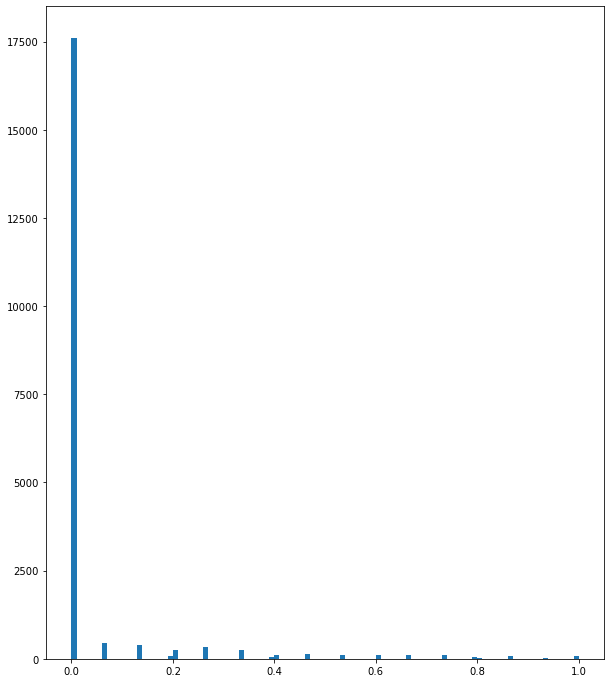

In [20]:
plt.figure(figsize=(10, 12))
plt.hist(knn_pred, bins=100);
print(pd.Series(np.where(knn_pred > 0.51, 1, 0).ravel()).value_counts())

In [21]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(146, 146, 146), 
                   activation="relu", solver="adam", alpha=1e-7, 
                   batch_size=128, learning_rate="constant", learning_rate_init=0.001, power_t=0.5, 
                   max_iter=5000, shuffle=True, random_state=2, tol=0.0001, verbose=False, 
                   warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                   validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)

nn_pred = np.zeros(ts.shape[0])
for i in range(1,4):
    nn.set_params(batch_size = 108 + i*10)
    nn.set_params(learning_rate_init = 0.0005 + i/2000)
    nn.set_params(alpha = i * 1e-7)
    nn.fit(scaler.transform(tr), train_metadata['target'])
    nn_pred += nn.predict_proba(scaler.transform(ts))[:,1]
    print(nn_pred, nn_pred.shape)
nn_pred /= 3
print(nn.classes_)
nn_pred

[9.32295372e-01 2.00188927e-03 1.55383836e-03 ... 1.74715786e-11
 3.06090045e-09 1.83209329e-19] (20337,)
[1.79788101e+00 4.02103249e-03 1.47456607e-02 ... 3.91670672e-09
 6.71196301e-08 1.80839444e-11] (20337,)
[1.82223703e+00 5.25484407e-03 1.63069006e-02 ... 3.94984787e-09
 7.22274116e-08 1.80840352e-11] (20337,)
[0 1]


array([6.07412343e-01, 1.75161469e-03, 5.43563354e-03, ...,
       1.31661596e-09, 2.40758039e-08, 6.02801172e-12])

0    19561
1      776
dtype: int64


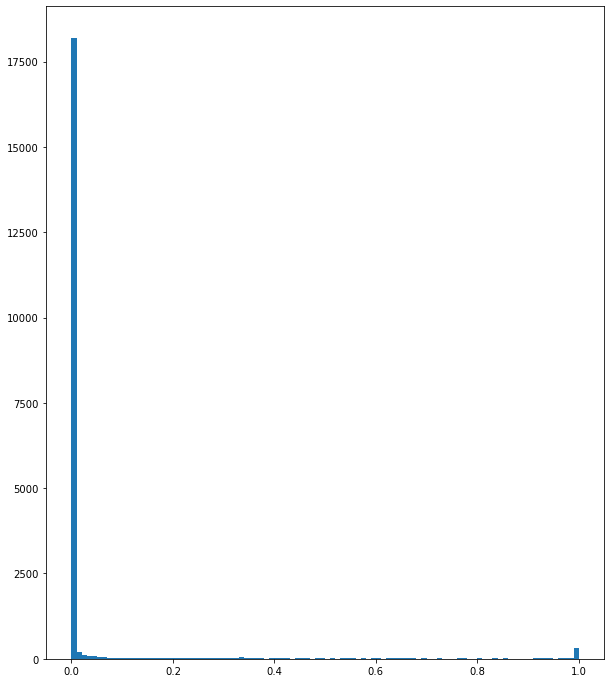

In [22]:
plt.figure(figsize=(10, 12))
plt.hist(nn_pred, bins=100);
print(pd.Series(np.where(nn_pred > 0.51, 1, 0).ravel()).value_counts())

In [23]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, 
                        class_weight=None, random_state=11, solver='liblinear', max_iter=1000, 
                        multi_class='ovr', verbose=0, warm_start=False, n_jobs=4)

lr_pred = np.zeros(ts.shape[0])
for i in range(1,4):
    lr.set_params(random_state = 11 + i)
    lr.set_params(C = 1.0 * i)
    lr.fit(tr, train_metadata['target'])
    lr_pred += lr.predict_proba(ts)[:,1]
lr_pred /= 3
lr.classes_

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 4.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


array([0, 1])

0    19723
1      614
dtype: int64


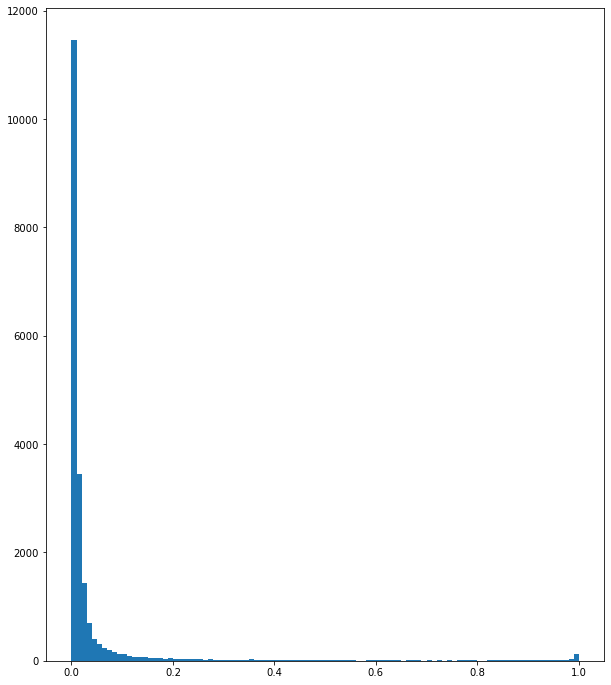

In [24]:
plt.figure(figsize=(10, 12))
plt.hist(lr_pred, bins=100);
print(pd.Series(np.where(lr_pred > 0.51, 1, 0).ravel()).value_counts())

In [25]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

gnb_bg = BaggingClassifier(base_estimator=gnb, n_estimators=3, max_samples=0.8, 
                      max_features=1.0, bootstrap=True, bootstrap_features=False, 
                      oob_score=False, warm_start=False, n_jobs=1, 
                      random_state=7, verbose=3)

gnb_bg.fit(tr, train_metadata['target'])
gnb_pred = gnb_bg.predict_proba(ts)[:,1]
gnb_bg.classes_

Building estimator 1 of 3 for this parallel run (total 3)...
Building estimator 2 of 3 for this parallel run (total 3)...
Building estimator 3 of 3 for this parallel run (total 3)...


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


array([0, 1])

0    19045
1     1292
dtype: int64


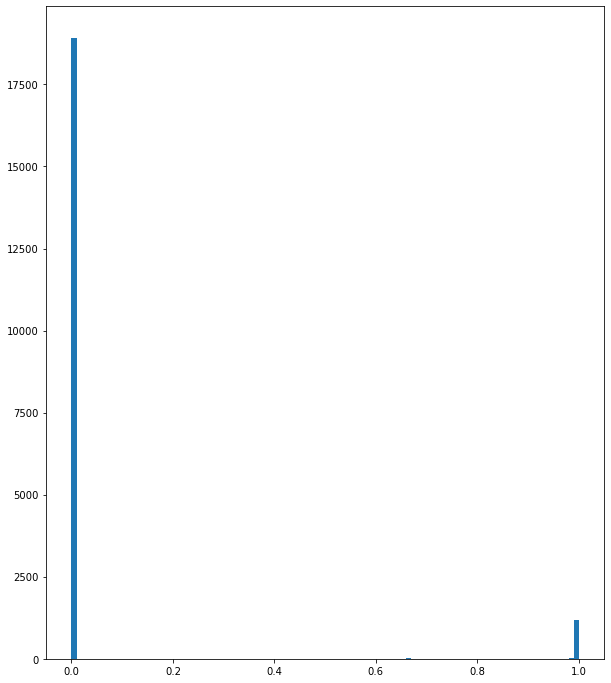

In [26]:
plt.figure(figsize=(10, 12))
plt.hist(gnb_pred, bins=100);
print(pd.Series(np.where(gnb_pred > 0.51, 1, 0).ravel()).value_counts())

In [27]:
preds = [light_pred, cat_pred, xgb_pred, knn_pred, nn_pred, lr_pred, gnb_pred]
weights = [3, 1, 1, 1, 1, 1, 1]
pred = np.zeros(ts.shape[0])
for i in range(len(preds)):
    pred += weights[i] * preds[i]
pred = pred / np.sum(weights)

0    19720
1      617
dtype: int64


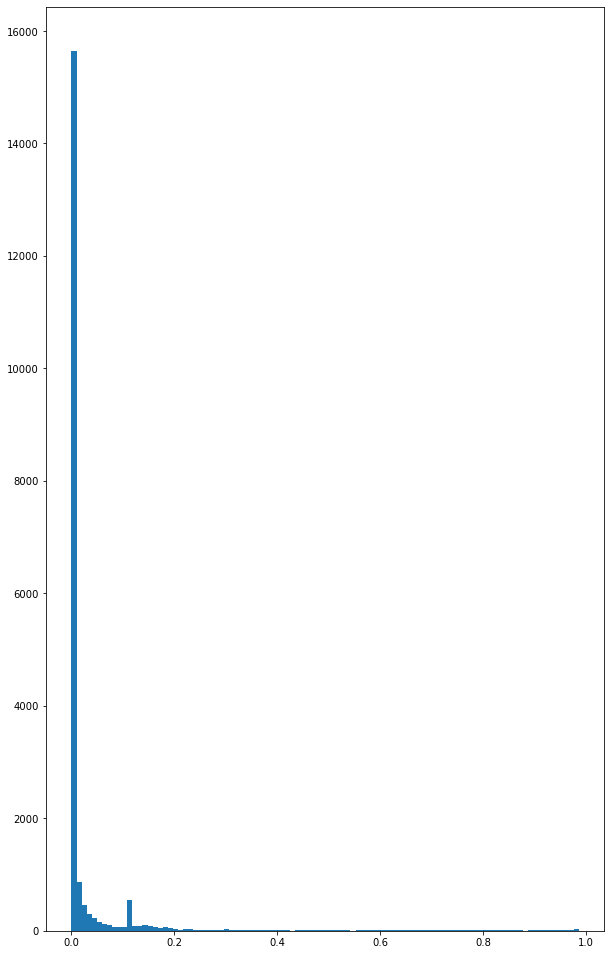

In [28]:
plt.figure(figsize=(10,17))
plt.hist(pred, bins=100);
print(pd.Series(np.where(pred > 0.51, 1, 0).ravel()).value_counts())

In [29]:
pred = np.where(pred > 0.51, 1, 0)

In [30]:
submission = pd.DataFrame({
        "signal_id": test_metadata['signal_id'],
        "target": pred
})

submission.to_csv('submission.csv', index=False)

Index(['sg_std', 'sg_mean', 'sg_skew', 'min_peak_width', 'min_peak_prom',
       'max_peak_width', 'sub-df_min_peak_width', 'sg_max', 'sg_min',
       'threshold_more_3', 'sub-df_h_bt_3_dist_bt_1000',
       'sub-df_h_bt_3_dist_bt_11111', 'max_peak_prom',
       'sub-df_h_bt_5_dist_bt_11111', 'sub-df_max_peak_prom',
       'h_bt_3_dist_bt_1000', 'h_bt_5_dist_bt_5', 'sub-df_max_peak_width',
       'threshold_more_16', 'threshold_more_10', 'h_bt_3_w_bt_5',
       'h_bt_8_dist_bt_11111', 'sub-df_min_peak_prom',
       'sub-df_h_bt_3_dist_bt_75', 'height_more_5'],
      dtype='object')


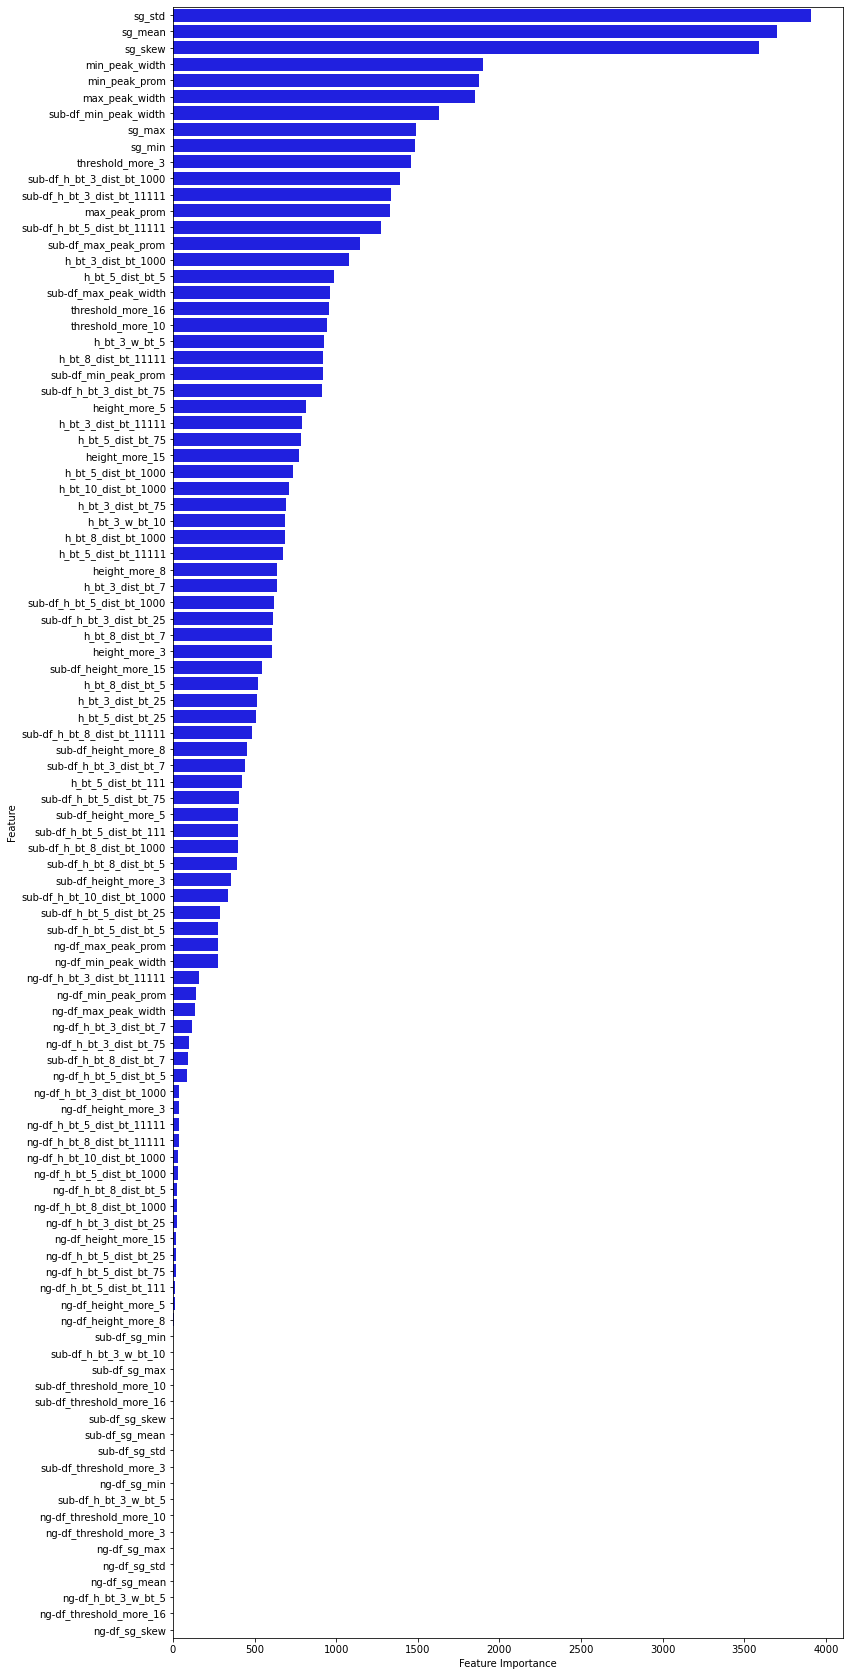

In [31]:
def plot_feat_importances(feature_names, fi, figsize=(12,8), color="blue"):
    feature_importances = fi
    feature_importances = pd.Series(
        feature_importances, index=feature_names
        ).sort_values(ascending=False).iloc[:100]
    fig, ax = plt.subplots(figsize=figsize)
    sns.barplot(x=feature_importances, 
                y=feature_importances.index, 
                color=color);
    plt.xlabel('Feature Importance');
    plt.ylabel('Feature');
    print(feature_importances.head(25).index)
feature_importances = light.feature_importance()
feature_names = ts.columns.values
plot_feat_importances(feature_names, feature_importances, figsize=(12, 30))

In [32]:

val = tr.copy()
val['target'] = train_metadata['target']
val = val.sample(frac=0.7, replace=True, random_state=2)
tr_pred = light.predict(val.drop('target', axis=1))
tr_pred = np.where(tr_pred > 0.8, 1, 0)
metrica(val['target'], tr_pred)

1.0

# --> Conclusiones

En este estudio se aplicaron las fases de la construcción de un proyecto de aprendizaje automático, lo que permitió terminar a satisfacción la presente monografía. La cual tenía como objetivo proponer un modelo de análisis de datos utilizando técnicas de aprendizaje automático, donde se quería predecir las fallas en las señales eléctricas tomadas por medio de sensores.

Los resultados obtenidos no son perfectos, pero se logró un alto grado de satisfacción, puesto que estamos clasificando las señales por medio de no solo un modelo de aprendizaje automático; se están utilizando varios modelos al tiempo, lo que nos beneficia en temas de confiabilidad al momento de clasificar una señal.

Todavía es posible mejorar aún más los resultados, utilizando técnicas más sofisticadas y potentes del Deep Learning; además, utilizando tensor flow que ofrece una gran cantidad de ayudas para la solución de este tipo de problemas; sin hablar de temas de preprocesamiento en donde se aumentaría la capacidad trabajando desde la nube, hadoop, etc.

Estos resultados pueden ser de gran utilidad para la empresa en caso de querer poner este modelo en productivo, ya que se ahorran altos costos de desplazamiento para el monitoreo manual de las señales, además de la mano de obra de los técnicos encargados de realizarlas. También como uno de los factores más importantes y motivantes de este proyecto, es que beneficiara el medio ambiente y se evitaran gran cantidad de los incendios forestales que eran causados por esta problemática.

Es necesario comentar que fue posible llevar a cabo la ejecución de este proyecto gracias a las técnicas vistas en la especialización en Analitica y Ciencia de Datos de la Universidad de Antioquia; también a la dedicación y acompañamiento del profesor Raul Ramos Pollan donde nos apoyó y nos guió en la idea de realizar una limpieza del ruido a las señales y también de realizar todo un proceso de featuring engineer para obtener unos datos más manipulables para el entrenamiento de los modelos.


**Nota:**
* En caso de querer profundizar mas en los resultado y las tecnicas utilizadas, es recomendable pasar por el repositorio publico: https://github.com/joseDalvear/VSB-Power-Line-Fault-Detection Donde podra encontrar una amplia explicación sobre las metodologías utilizadas a donde se pretendia llegar con el proyecto